In [30]:
import pandas as pd
import numpy as np
import os
import csv
import shutil
import matplotlib.pyplot as plt
from dds_utils import writeResult
import ast

In [31]:
def get_data(filename, directory=None):
    combs = []
    if directory:
        data = open(f"./{directory}/{filename}-1.csv").readlines()
    else:
        data = open(f"./{filename}-1.csv").readlines()
    for i in range(28):
        temp = data[i].strip()
        combs.append(temp)
    return combs

In [40]:
improvement_accSen = get_data("improvement_accSen")
improvement_inferDiff = get_data("improvement_inferDiff")
keys_accSen = get_data("consistency_accSen")
keys_inferDiff = get_data("consistency_inferDiff")
keys_consistency = get_data("consistency_key")
vals_consistency = get_data("consistency_val")
consistencyDict = {keys_consistency[i]: float(vals_consistency[i]) for i in range(len(keys_consistency))}
accSenDict = {keys_accSen[i]: float(improvement_accSen[i]) for i in range(len(keys_accSen))}
inferDiffDict = {keys_inferDiff[i]: float(improvement_inferDiff[i]) for i in range(len(keys_inferDiff))}
print(consistencyDict)
x = []
y = []
c = []
for key in keys_accSen:
    if consistencyDict[key] != -1:
        x.append(inferDiffDict[key])
        y.append(accSenDict[key])
        c.append(consistencyDict[key])
# mapImprovement = dict(zip(keys, improvement))
# top_10 = ['consistency(1050, 30, hochiminh roppongi timesquare)',
#  'consistency(1350, 30, aberdeen india lagrange)',
#  'consistency(1050, 30, aberdeen india lagrange)',
#  'consistency(1200, 30, hochiminh miami roppongi)',
#  'consistency(1050, 50, hochiminh miami roppongi)',
#  'consistency(1350, 30, boston jakarta lagrange)',
#  'consistency(900, 50, aberdeen timesquare jakarta-uav)',
#  'consistency(1200, 30, aberdeen india lagrange)',
#  'consistency(1200, 30, aberdeen timesquare jakarta-uav)',
#  'consistency(1200, 30, hochiminh roppongi timesquare)']
# iter = 1
# for comb in top_10:
#     print(f"{iter}. {comb}: {mapImprovement[comb]}")
#     iter += 1

{'consistency(900, 30, jakarta miami coldwater)': 0.6666666666666666, 'consistency(1200, 30, jakarta miami coldwater)': 0.5555555555555556, 'consistency(1350, 30, jakarta miami coldwater)': 0.3333333333333333, 'consistency(900, 30, aberdeen india lagrange)': 1.0, 'consistency(1050, 30, aberdeen india lagrange)': 0.75, 'consistency(1200, 30, aberdeen india lagrange)': 0.7272727272727273, 'consistency(1350, 30, aberdeen india lagrange)': 0.6666666666666666, 'consistency(900, 30, aberdeen timesquare jakarta-uav)': 1.0, 'consistency(1050, 30, aberdeen timesquare jakarta-uav)': -1.0, 'consistency(1200, 30, aberdeen timesquare jakarta-uav)': 0.3333333333333333, 'consistency(1350, 30, aberdeen timesquare jakarta-uav)': 0.9090909090909091, 'consistency(1050, 30, boston india tilton)': 0.5, 'consistency(1200, 30, boston india tilton)': 0.8, 'consistency(1350, 30, boston india tilton)': 0.8, 'consistency(900, 30, hochiminh miami roppongi)': 0.6666666666666666, 'consistency(1200, 30, hochiminh mi

In [43]:
inferDiffDict

{'consistency(900, 30, jakarta miami coldwater)': -0.0006666666666667043,
 'consistency(1050, 30, jakarta miami coldwater)': 0.005333333333333412,
 'consistency(900, 30, aberdeen india lagrange)': 0.006999999999999895,
 'consistency(1050, 30, aberdeen india lagrange)': 0.005333333333333301,
 'consistency(1200, 30, aberdeen india lagrange)': 0.008999999999999897,
 'consistency(1350, 30, aberdeen india lagrange)': -0.0033333333333332993,
 'consistency(900, 30, aberdeen timesquare jakarta-uav)': -0.006000000000000061,
 'consistency(1050, 30, aberdeen timesquare jakarta-uav)': -0.00933333333333336,
 'consistency(1200, 30, aberdeen timesquare jakarta-uav)': -0.0013333333333332975,
 'consistency(1350, 30, aberdeen timesquare jakarta-uav)': 0.014333333333333309,
 'consistency(900, 30, boston india tilton)': 0.004000000000000226,
 'consistency(1050, 30, boston india tilton)': 0.0003333333333332966,
 'consistency(1200, 30, boston india tilton)': -0.0006666666666665932,
 'consistency(1350, 30, b

Text(0.5, 1.0, 'Bandwidth Delta = 30kbps')

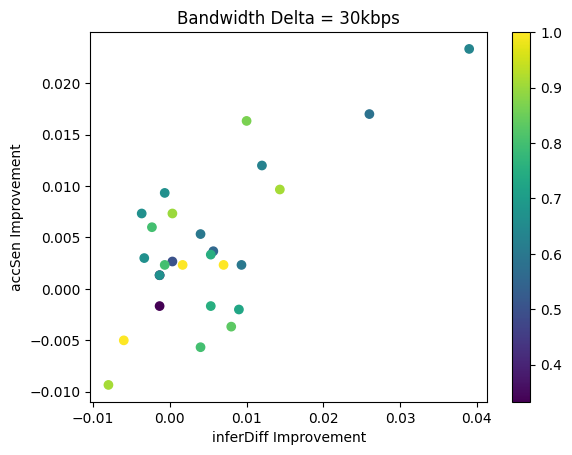

In [42]:
plt.scatter(x, y, c=c)
plt.colorbar()
plt.xlabel("inferDiff Improvement")
plt.ylabel("accSen Improvement")
plt.title("Bandwidth Delta = 30kbps")

In [31]:
mapImprovement

{'consistency(900, 10, jakarta miami coldwater)': '-0.001000000000000112',
 'consistency(1050, 10, jakarta miami coldwater)': '0.006000000000000116',
 'consistency(1200, 10, jakarta miami coldwater)': '0.004666666666666597',
 'consistency(1350, 10, jakarta miami coldwater)': '-0.0009999999999998899',
 'consistency(900, 10, aberdeen india lagrange)': '0.006333333333333413',
 'consistency(1050, 10, aberdeen india lagrange)': '0.0010000000000000009',
 'consistency(1200, 10, aberdeen india lagrange)': '2.220446049250313e-16',
 'consistency(1350, 10, aberdeen india lagrange)': '0.0033333333333334103',
 'consistency(900, 10, aberdeen timesquare jakarta-uav)': '-0.009333333333333305',
 'consistency(1050, 10, aberdeen timesquare jakarta-uav)': '-0.006666666666666654',
 'consistency(1200, 10, aberdeen timesquare jakarta-uav)': '-0.002666666666666706',
 'consistency(1350, 10, aberdeen timesquare jakarta-uav)': '-0.002999999999999947',
 'consistency(900, 10, boston india tilton)': '0.002000000000

In [7]:
def get_data_consistency(mode):
#     mapper = {1: "normal", 2: "allocation", 3:"normalized_allocation", 4:"normalized_normal"}
    mapper = {1:"normalized_allocation"}
    data_dict = {}
    iter = 1
    if mode == "upwardsConsistency":
        with open(f"./dds-inferDiff-Jan-03/{mode}-1.csv", "r") as file:
            for line in file:
                data = ast.literal_eval(line)
                data_dict[mapper[iter]] = data
    else:
        with open(f"./dds-inferDiff-Jan-03/{mode}-1.csv", "r") as file:
            for line in file:
                data = ast.literal_eval(line)
                data_dict[mapper[iter]] = data
                iter += 1
                if iter == 5:
                    break
    return data_dict

Text(0.5, 1.0, 'Bandwidth Delta = 30kbps')

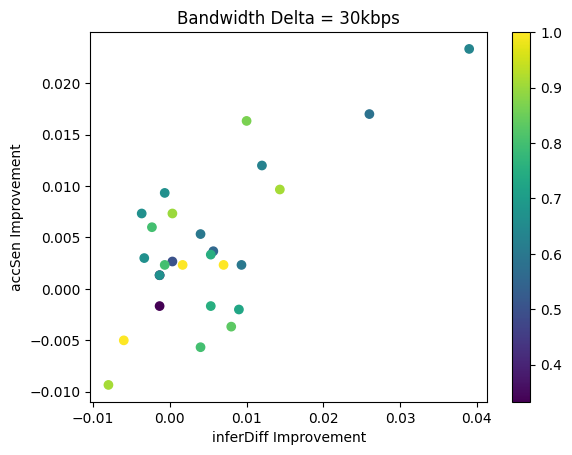

In [43]:
bothDirections = get_data_consistency("bothDirectionsConsistency")
bothDirectionsNormalizedAllocation = bothDirections["normalized_allocation"]

In [44]:
combinations = {0:"- jakarta miami coldwater",
1: "- aberdeen india lagrange",
2: "- aberdeen timesquare jakarta-uav",
3: "- boston india tilton",
4: "- hochiminh miami roppongi",
5: "- boston jakarta lagrange",
6: "- hochiminh roppongi timesquare"}

In [47]:
def dataProcessing(mode, data_dict):
    combinations = {0:"jakarta miami coldwater",
                    1: "aberdeen india lagrange",
                    2: "aberdeen timesquare jakarta-uav",
                    3: "boston india tilton",
                    4: "hochiminh miami roppongi",
                    5: "boston jakarta lagrange",
                    6: "hochiminh roppongi timesquare"}
    bws = [900 + i for i in range(0,600,150)]
    deltas = [10, 30, 50, 100]
    combinations_temp = [i for i in range(7)]
    res_dict = {}
    iter = 0
    for delta in deltas:
        for comb in combinations_temp:
            for bw in bws:
                if delta == 30 or delta == 50:
                    key = f"consistency({bw}, {delta}, {combinations[comb]})"
                    res_dict[key] = data_dict[mode][iter]
    #                 if not key in res_dict:
    #                     res_dict[key] = [data_dict[mode][iter], [data_dict[mode][iter]]]
    #                 else:
    #                     res_dict[key][0] += data_dict[mode][iter]
    #                     res_dict[key][1].append(data_dict[mode][iter])
                iter += 1
    return res_dict

In [48]:
normalizedAlloc = dataProcessing("normalized_allocation", bothDirections)
# normalizedAlloc = dict(list(normalizedAlloc.items())
print(normalizedAlloc)

{'consistency(900, 30, jakarta miami coldwater)': 0.48148148148148145, 'consistency(1050, 30, jakarta miami coldwater)': 0.6206896551724138, 'consistency(1200, 30, jakarta miami coldwater)': 0.5625, 'consistency(1350, 30, jakarta miami coldwater)': 0.6666666666666666, 'consistency(900, 30, aberdeen india lagrange)': 0.7307692307692307, 'consistency(1050, 30, aberdeen india lagrange)': 0.9166666666666666, 'consistency(1200, 30, aberdeen india lagrange)': 0.8285714285714286, 'consistency(1350, 30, aberdeen india lagrange)': 0.9393939393939394, 'consistency(900, 30, aberdeen timesquare jakarta-uav)': 0.8181818181818182, 'consistency(1050, 30, aberdeen timesquare jakarta-uav)': 0.7727272727272727, 'consistency(1200, 30, aberdeen timesquare jakarta-uav)': 0.8275862068965517, 'consistency(1350, 30, aberdeen timesquare jakarta-uav)': 0.7037037037037037, 'consistency(900, 30, boston india tilton)': 0.7948717948717948, 'consistency(1050, 30, boston india tilton)': 0.7777777777777778, 'consisten

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['#9F0DDA', '#37524C', '#82ECCF', '#FFE25B', '#DC41C2', '#F0B4B5', '#A6155F', '#BC8439', '#302B57', '#301602', '#CFFBFC', '#4C314B', '#57DEA5', '#C7B26A']


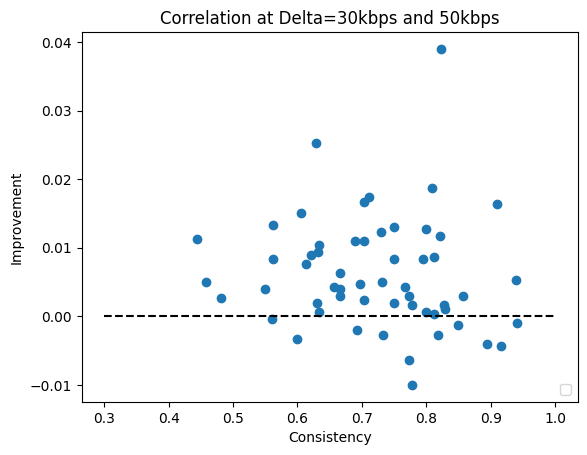

In [51]:
combinations = {0:"jakarta miami coldwater",
                1: "aberdeen india lagrange",
                2: "aberdeen timesquare jakarta-uav",
                3: "boston india tilton",
                4: "hochiminh miami roppongi",
                5: "boston jakarta lagrange",
                6: "hochiminh roppongi timesquare"}
import random

number_of_colors = 14

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)
deltas = [10, 30, 50, 100]
bws = [900, 1050, 1200, 1350]
iter = 0
# for delta in deltas:
# for bw in bws:
#     x = []
#     y = []
#     for comb in combinations.values():
#         for key in normalizedAlloc.keys():
#             if f"{bw}" in key and comb in key:
#                 x.append(normalizedAlloc[key])
#                 y.append(float(mapImprovement[key]))
#     plt.scatter(x, y)
# #         iter += 1
#     plt.xlabel("Consistency")
#     plt.ylabel("Improvement")
#     plt.title(f"consistency at {bw}")
#     plt.legend(loc="lower right")
#     plt.show()
x = []
y = []
for key in normalizedAlloc.keys():
        x.append(normalizedAlloc[key])
        y.append(float(mapImprovement[key]))
plt.scatter(x, y)
plt.hlines(0,0.3,1, linestyles="dashed", color="k",)
#         iter += 1
plt.xlabel("Consistency")
plt.ylabel("Improvement")
plt.title("Correlation at Delta=30kbps and 50kbps")
plt.legend(loc="lower right")
plt.show()

In [50]:
normalizedAlloc

{'consistency(900, 30, jakarta miami coldwater)': 0.48148148148148145,
 'consistency(1050, 30, jakarta miami coldwater)': 0.6206896551724138,
 'consistency(1200, 30, jakarta miami coldwater)': 0.5625,
 'consistency(1350, 30, jakarta miami coldwater)': 0.6666666666666666,
 'consistency(900, 30, aberdeen india lagrange)': 0.7307692307692307,
 'consistency(1050, 30, aberdeen india lagrange)': 0.9166666666666666,
 'consistency(1200, 30, aberdeen india lagrange)': 0.8285714285714286,
 'consistency(1350, 30, aberdeen india lagrange)': 0.9393939393939394,
 'consistency(900, 30, aberdeen timesquare jakarta-uav)': 0.8181818181818182,
 'consistency(1050, 30, aberdeen timesquare jakarta-uav)': 0.7727272727272727,
 'consistency(1200, 30, aberdeen timesquare jakarta-uav)': 0.8275862068965517,
 'consistency(1350, 30, aberdeen timesquare jakarta-uav)': 0.7037037037037037,
 'consistency(900, 30, boston india tilton)': 0.7948717948717948,
 'consistency(1050, 30, boston india tilton)': 0.777777777777777

Text(0.5, 1.0, 'Bandwidth Delta = 30kbps')

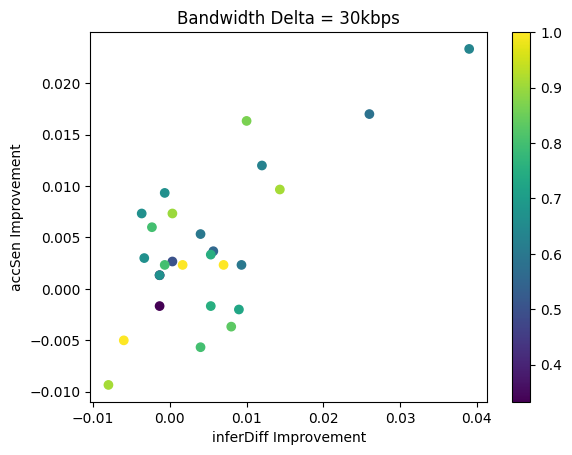

In [38]:
plt.scatter(x, y, c=c)
plt.colorbar()
plt.xlabel("inferDiff Improvement")
plt.ylabel("accSen Improvement")
plt.title("Bandwidth Delta = 30kbps")

In [39]:
np.corrcoef(x,y)

array([[1.        , 0.70998618],
       [0.70998618, 1.        ]])